In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations as comb, product, permutations

1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).


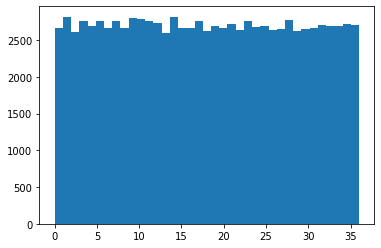

In [31]:
cells = np.zeros((37,))
for _ in range(100000):
    cells[np.random.randint(37)] += 1

ds = pd.Series(data=cells, index=np.arange(37), name='roulette')

plt.hist(ds.index, bins=37, weights=cells)
plt.show()

Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [39]:
roulette = pd.DataFrame({'cell': range(37), 'color': 0})

colors_idx = [
        0, 32, 15, 19, 4, 21, 2, 25, 17, 34, 6, 27,
        13, 36, 11, 30, 8, 23, 10, 5, 24, 16, 33, 1,
        20, 14, 31, 9, 22, 18, 29, 7, 28, 12, 35, 3, 26
    ]

for i in range(1, len(roulette)):
    if colors_idx.index(i) % 2 == 0:
        roulette.loc[i, 'color'] = 'black'
    else:
        roulette.loc[i, 'color'] = 'red'

for _ in range(100000):
    roulette.loc[np.random.randint(37), 'cell'] += 1

In [40]:
# red probability (odd index)

P_red = roulette.loc[roulette.color == 'red', 'cell'].sum() / roulette['cell'].sum()
P_red

0.488387340313512

In [41]:
# black probability

P_black = roulette.loc[roulette.color == 'black', 'cell'].sum() / roulette['cell'].sum()
P_black

0.4847813561679216

In [42]:
# probability of non-zero cell
P_red_black = roulette.loc[roulette.color.isin(['red', 'black']), 'cell'].sum() / roulette['cell'].sum()

P_red_black, P_red + P_black

(0.9731686964814337, 0.9731686964814337)

Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9. 

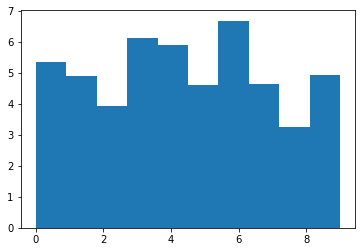

In [56]:
samples = np.array([np.random.rand(10) for _ in range(10)])

plt.hist(x=np.arange(10), weights=samples.sum(axis=1))
plt.show()

Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.


In [67]:
k = 0
n = 10_000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(len(x)):
    if x[i] == 2:
        k += 1
print(k, n, k/n)

3783 10000 0.3783


In [61]:
def combinations(n: int, k: int) -> int:
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

In [62]:
k = 2
n = 4
combinations(n, k)

6

In [64]:
P = combinations(n,k) * 1/2**n
P

0.375

Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.


In [74]:
k = 0
n = 10_000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)
e = np.random.randint(0, 2, n)
x = a + b + c + d + f + e
for i in range(len(x)):
    if x[i] == 3:
        k += 1
print(k, n, k/n)

3188 10000 0.3188


In [69]:
k = 3
n = 6

In [71]:
P = combinations(n,k) * 1/2**n
P

0.3125

(не обязательно, но желательно) Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k


In [81]:
for p in permutations('012345', 2):
    print(*p, sep='-', end=' ')

0-1 0-2 0-3 0-4 0-5 1-0 1-2 1-3 1-4 1-5 2-0 2-1 2-3 2-4 2-5 3-0 3-1 3-2 3-4 3-5 4-0 4-1 4-2 4-3 4-5 5-0 5-1 5-2 5-3 5-4 

In [82]:
n = 6
k = 2
n * (n - k + 1)

30

In [85]:
for p in comb('012345', 2):
    print(*p, sep='')

01
02
03
04
05
12
13
14
15
23
24
25
34
35
45


In [84]:
combinations(n,k)

15

(не обязательно) Дополните код расчетом коэффициента корреляции x и y по формуле


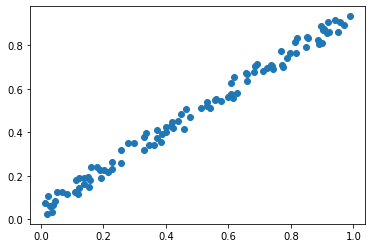

In [89]:
n = 100
r = 0.9
x=np.random.rand(n)
y = r * x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.show()

In [93]:
np.corrcoef(x,y)[0,1]

0.994871007832893

In [94]:
np.sum((x - x.mean())*(y - y.mean())) / np.sqrt((np.sum(np.power(x - x.mean(), 2))* (np.sum(np.power(y - y.mean(), 2))))) 

0.9948710078328933